# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [2]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [4]:
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [108]:
movies.dtypes

movie_title            object
rating                 object
genre                  object
in_theaters_date       object
runtime_in_minutes    float64
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [13]:
movies[movies['in_theaters_date'].str[:4] >= '2010'].shape

(6053, 9)

In [110]:
movies['in_theaters_date']=pd.to_datetime(movies['in_theaters_date'])

In [111]:
movies = movies[movies['in_theaters_date'].dt.year >= 2010]

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [112]:
(movies[
 (movies.tomatometer_rating == movies.tomatometer_rating.max())
 & (movies.audience_rating == movies.audience_rating.max())
 ]
)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
15001,The Uncondemned,NR,Documentary,2016-10-21,81.0,100,13,100.0,124.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [113]:
popular_movies = movies[movies.audience_count >= 100000]
popular_movies.shape

(316, 9)

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [114]:
(popular_movies[
 (popular_movies.tomatometer_rating == popular_movies.tomatometer_rating.max())
 | (popular_movies.audience_rating == popular_movies.audience_rating.max())
 ]
)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [115]:
popular_movies.rating.value_counts()

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [116]:
popular_movies.groupby('rating')['audience_rating'].mean().sort_values(ascending=False)

rating
PG-13    67.293750
PG       66.823529
G        66.200000
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [52]:
import numpy as np

In [117]:
popular_movies['Animation'] = np.where(popular_movies.genre.str.lower().str.contains('animation'), 1, 0)
popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.lower().str.contains('action & adventure'), 1, 0)
popular_movies['Comedy'] = np.where(popular_movies.genre.str.lower().str.contains('comedy'), 1, 0)

/var/folders/4d/cd2ycdfs3_q2fmj_pj4p45cc0000gn/T/ipykernel_12615/1485463020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['Animation'] = np.where(popular_movies.genre.str.lower().str.contains('animation'), 1, 0)
/var/folders/4d/cd2ycdfs3_q2fmj_pj4p45cc0000gn/T/ipykernel_12615/1485463020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.lower().str.contains('action & adventure'), 1, 0)
/var/folders/4d/cd2ycdfs3_q2

In [118]:
popular_movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,0,1,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,0,1,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,0,1,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [127]:
popular_movies.groupby('rating')[['Animation','Action & Adventure','Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

Summary:
On average Animation movies get greater rating than others. High rating is observed from both audience and tomatometer.
Action & Adventure movies get higher estimates from audience
Among all genres in scope, Comedy movies get the lowest rating from critics. On the other hand, rating from audience is almost the same as for Action & Adventure

In [121]:
popular_movies[['audience_rating','tomatometer_rating']][popular_movies.Animation == 1].mean()

audience_rating       75.161290
tomatometer_rating    75.258065
dtype: float64

In [128]:
popular_movies.groupby('Animation')[['audience_rating','tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Animation,,
0,64.831579,58.340351
1,75.161290,75.258065


In [122]:
popular_movies[['audience_rating','tomatometer_rating']][popular_movies['Action & Adventure'] == 1].mean()

audience_rating       66.219653
tomatometer_rating    60.734104
dtype: float64

In [129]:
popular_movies.groupby('Action & Adventure')[['audience_rating','tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Action & Adventure,,
0,65.391608,59.111888
1,66.219653,60.734104


In [123]:
popular_movies[['audience_rating','tomatometer_rating']][popular_movies.Comedy == 1].mean()

audience_rating       62.769231
tomatometer_rating    55.576923
dtype: float64

In [131]:
popular_movies.groupby('Comedy')[['audience_rating','tomatometer_rating']].mean()

,audience_rating,tomatometer_rating
Comedy,,
0,67.353774,62.169811
1,62.769231,55.576923


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

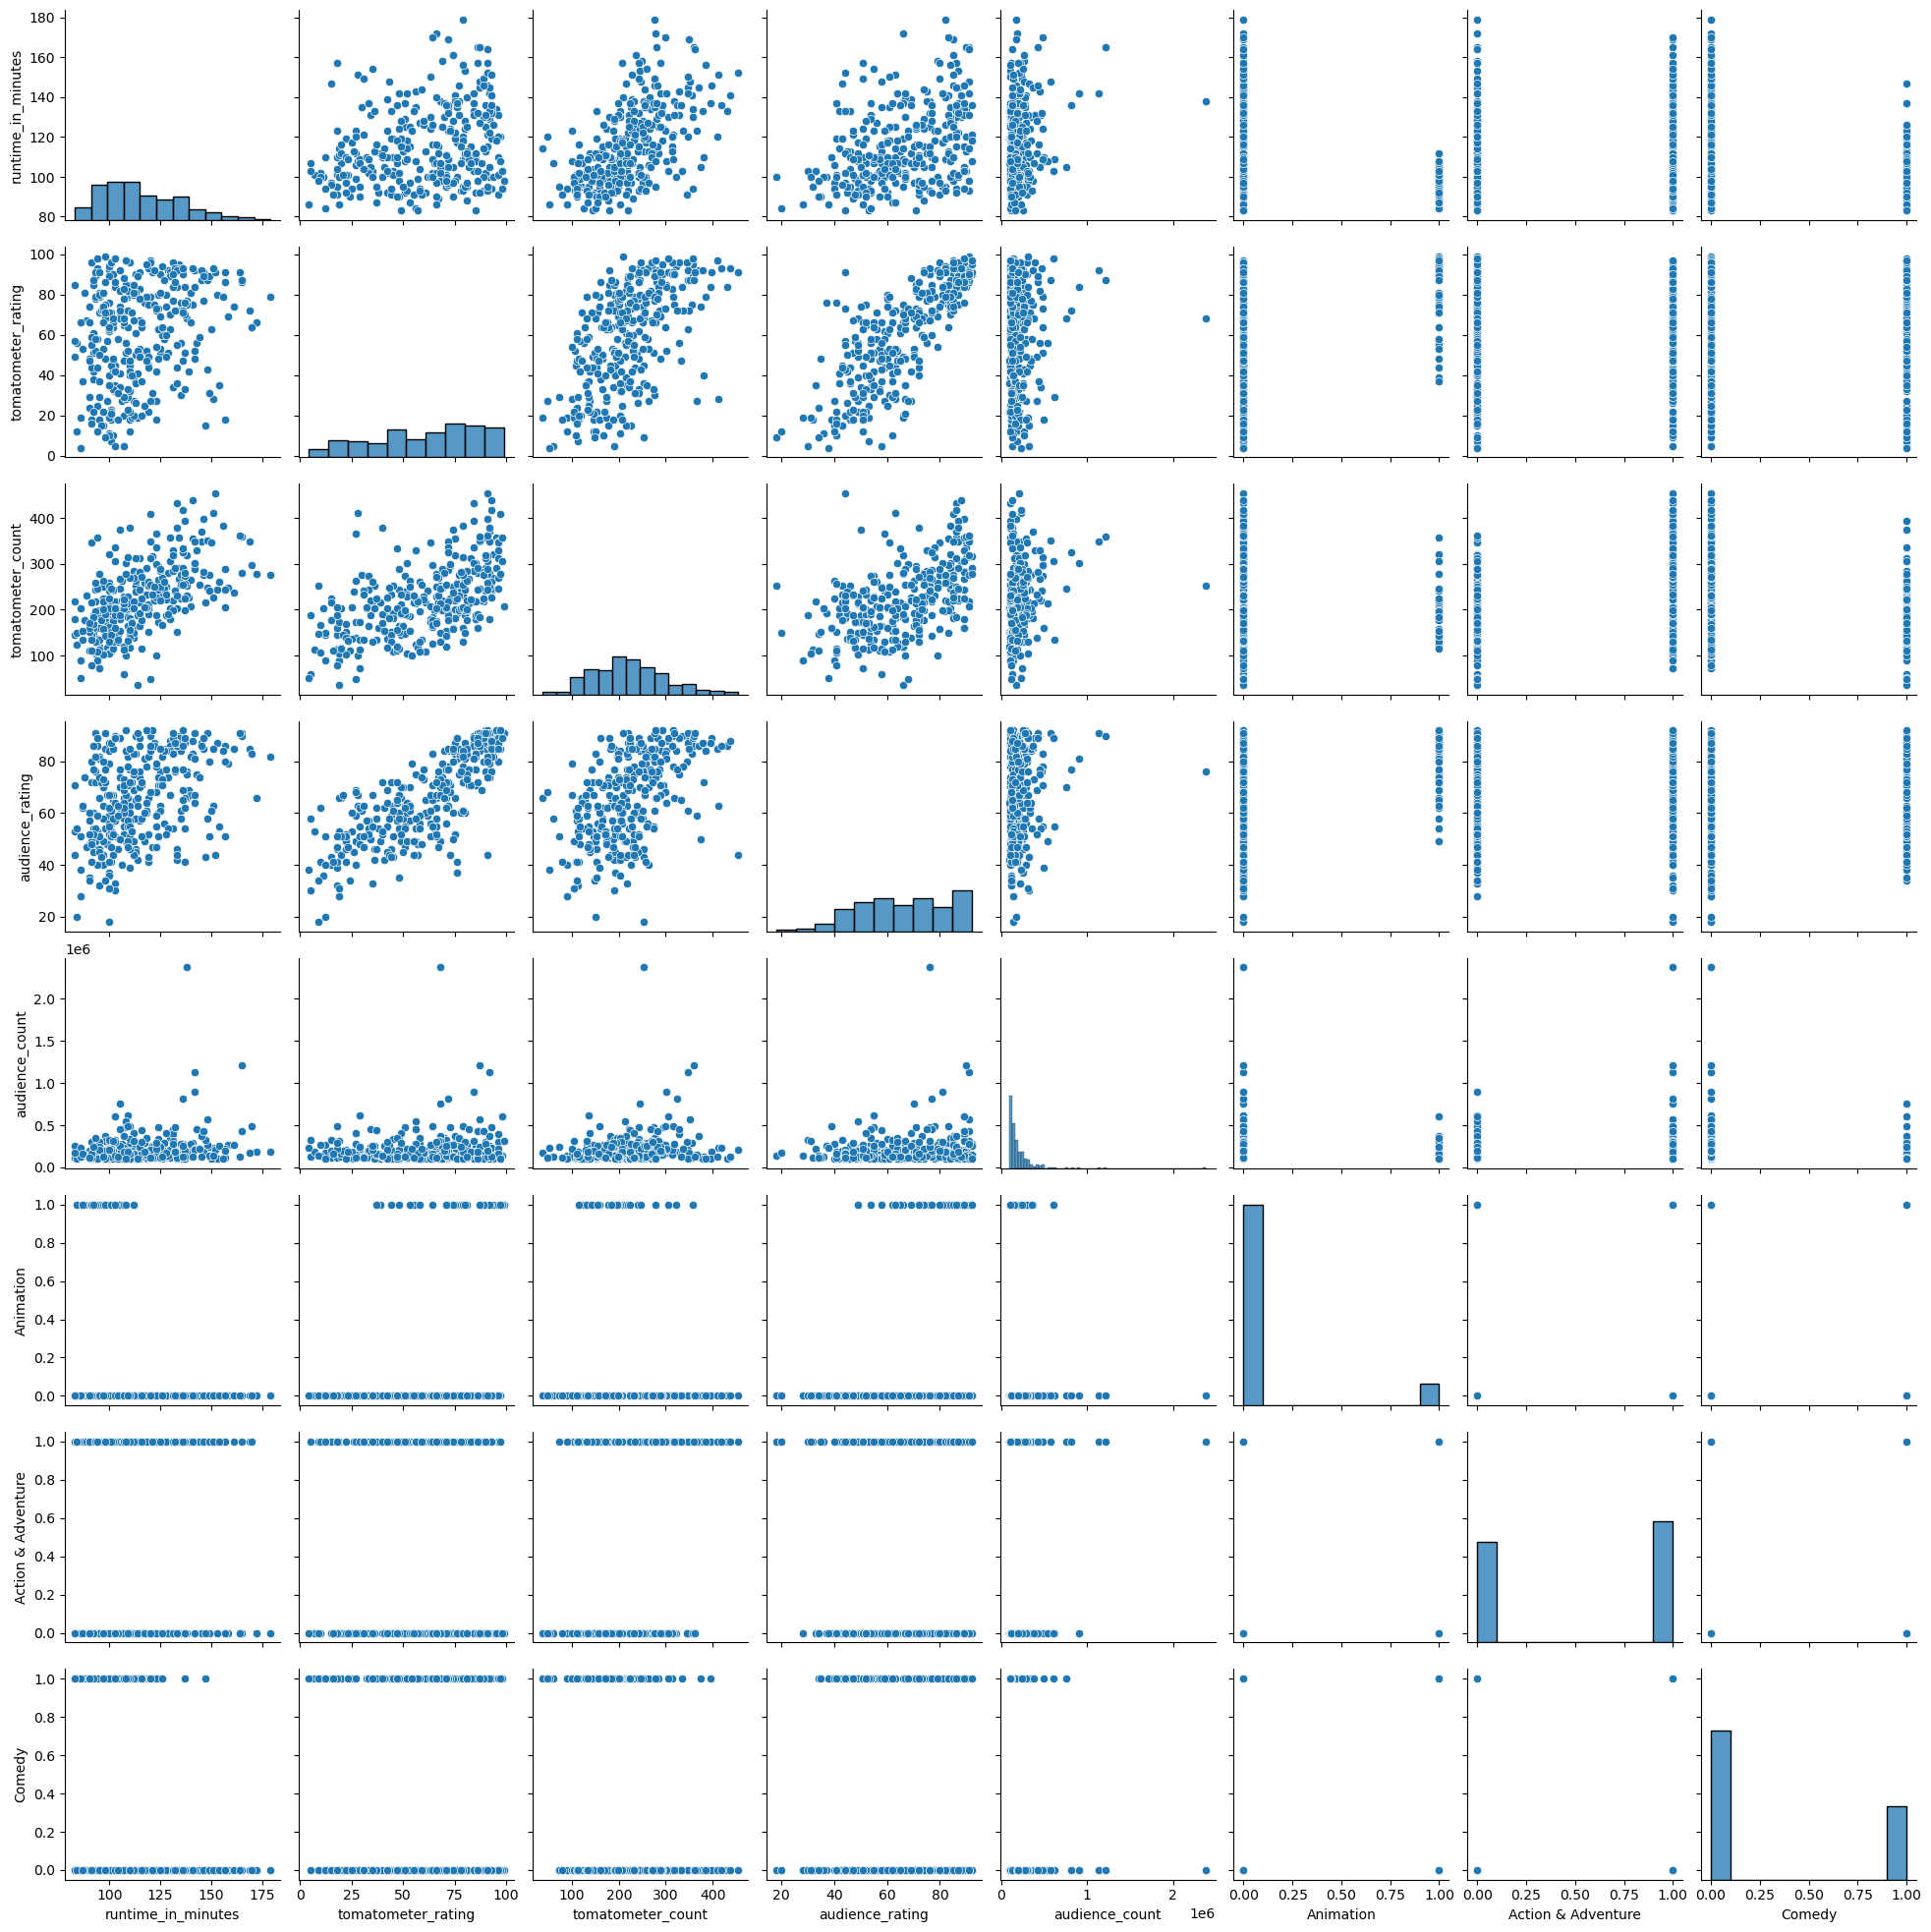

In [124]:
import seaborn as sns
sns.pairplot(popular_movies)

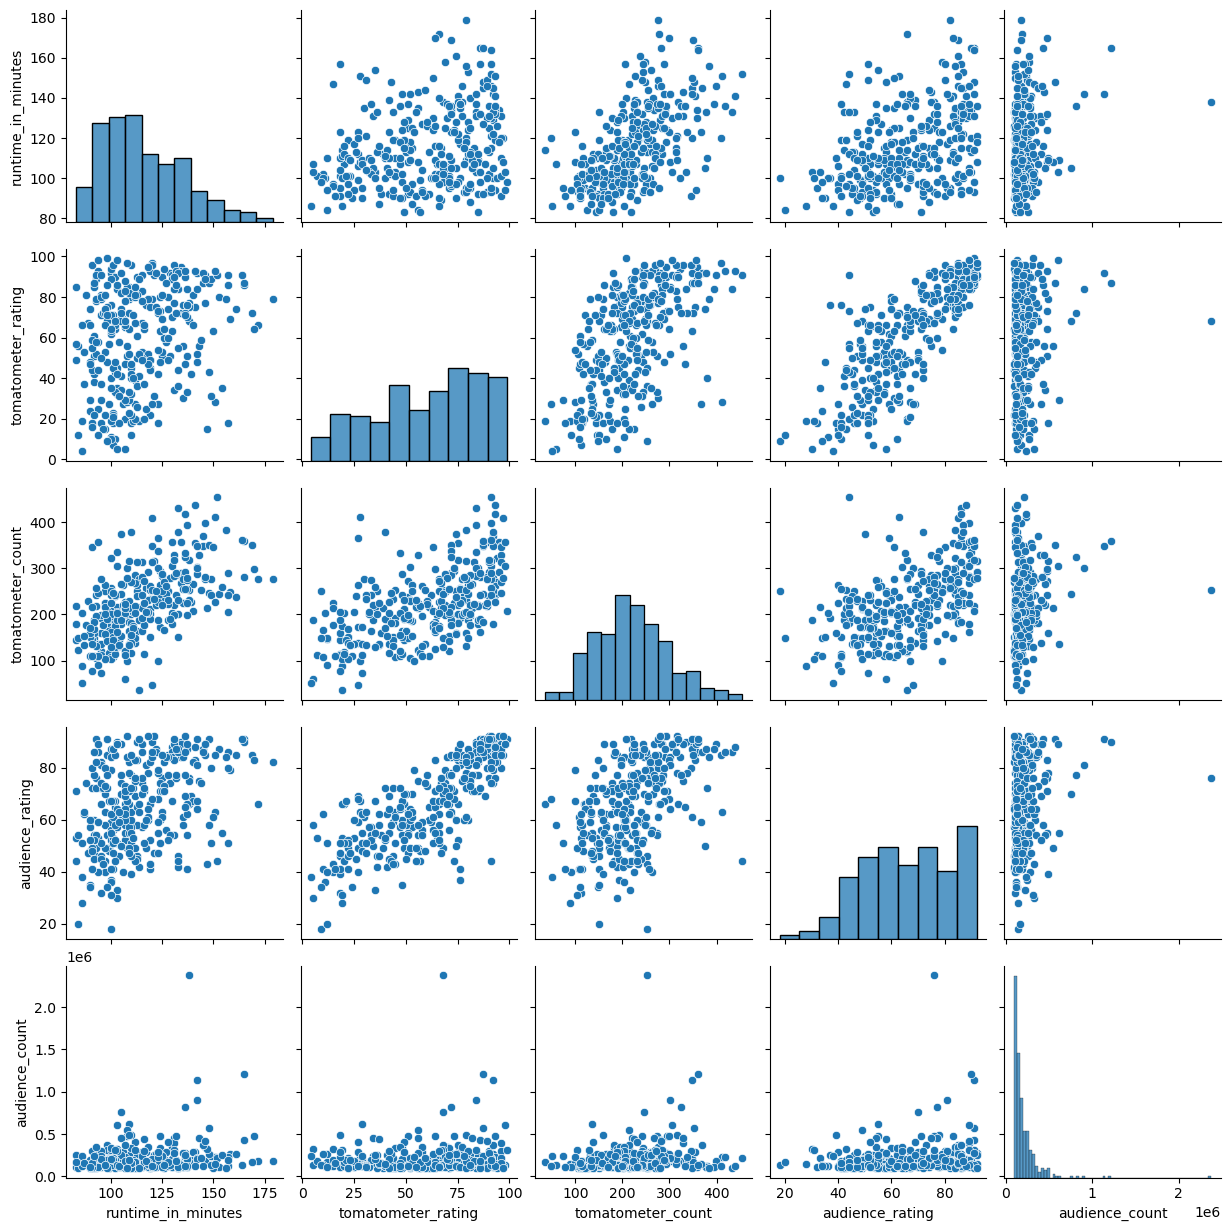

In [133]:
sns.pairplot(popular_movies.iloc[:,:-3])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
     Majority of audience rate movies from 40 to 90, most frequent rating is ~85 and ~50. Audience ratig has almost none estimates up to 25.
     Critic rating is evenly distributed across the scale with a large number of ratings of ~70.
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
     Animations and comedy has shorter duration than Action & Adventure.
     Longer movies has less count of estimates
* What is the most popular movie by far in terms of the number of audience ratings?
     Shutter Island

<Axes: ylabel='Count'>

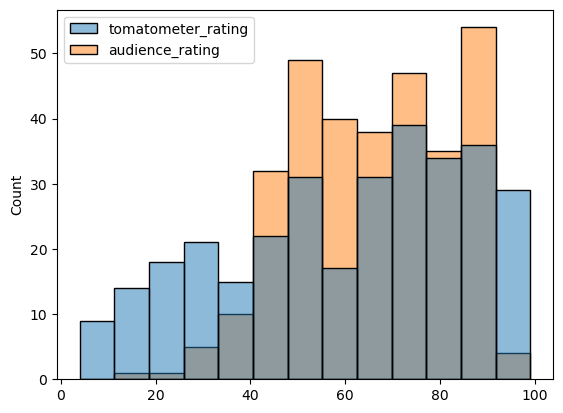

In [125]:
sns.histplot([popular_movies.tomatometer_rating, popular_movies.audience_rating])

In [126]:
popular_movies[popular_movies.audience_count==popular_movies.audience_count.max()]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,1,0
